In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Load data**

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5565,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5566,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5567,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5568,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# **Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [4]:
#drop last 3 columns as it is having mostly null values
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
# rename column names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#label encode target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5565,1,This is the 2nd time we have tried 2 contact u...
5566,0,Will Ì_ b going to esplanade fr home?
5567,0,"Pity, * was in mood for that. So...any other s..."
5568,0,The guy did some bitching but I acted like i'd...


# **EDA**

In [11]:
#check if data is balanced
df['target'].value_counts()

0    4514
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3747fc9510>,
 [Text(-1.0144343458276333, 0.4253503943871003, 'ham'),
  Text(1.014434325915543, -0.42535044187619947, 'spam')],
 [Text(-0.5533278249968908, 0.23200930602932743, '87.36'),
  Text(0.5533278141357506, -0.23200933193247242, '12.64')])

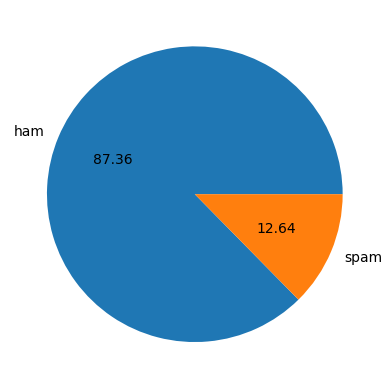

In [12]:
plt.pie(df['target'].value_counts(),autopct='%0.2f',labels=['ham','spam'])

In [13]:
df['num_characters'] = df['text'].apply(len)

In [14]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5565,1,This is the 2nd time we have tried 2 contact u...,161
5566,0,Will Ì_ b going to esplanade fr home?,37
5567,0,"Pity, * was in mood for that. So...any other s...",57
5568,0,The guy did some bitching but I acted like i'd...,125


In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
#get no of words in each text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5565,1,This is the 2nd time we have tried 2 contact u...,161,35
5566,0,Will Ì_ b going to esplanade fr home?,37,9
5567,0,"Pity, * was in mood for that. So...any other s...",57,15
5568,0,The guy did some bitching but I acted like i'd...,125,27


In [18]:
#get no of sentences in each text
df['num_sentences'] = df['text'].apply((lambda x:len(nltk.sent_tokenize(x))))

In [19]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5565,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5566,0,Will Ì_ b going to esplanade fr home?,37,9,1
5567,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5568,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5167.000000,5167.000000,5167.000000,5167.000000
mean,0.126379,78.999419,18.460809,1.965938
std,0.332308,58.237324,13.324894,1.448697
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
#check for no of words and sentences for ham messages
df[df['target']==0][['target','num_characters','num_words','num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,4514.0,4514.000000,4514.000000,4514.000000
mean,0.0,70.480062,17.128932,1.820558
std,0.0,56.362012,13.494736,1.383856
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [22]:
#check for no of words and sentences for spam messages
df[df['target']==1][['target','num_characters','num_words','num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


After comparing the word and sentence count for both type of messages, we can see that spam messages are longer than ham messages.

<Axes: xlabel='num_characters', ylabel='Count'>

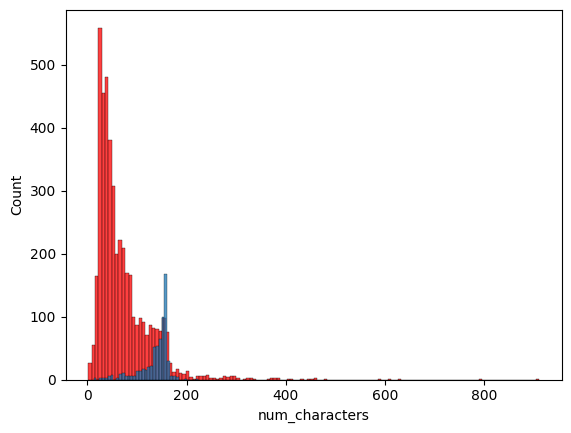

In [23]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

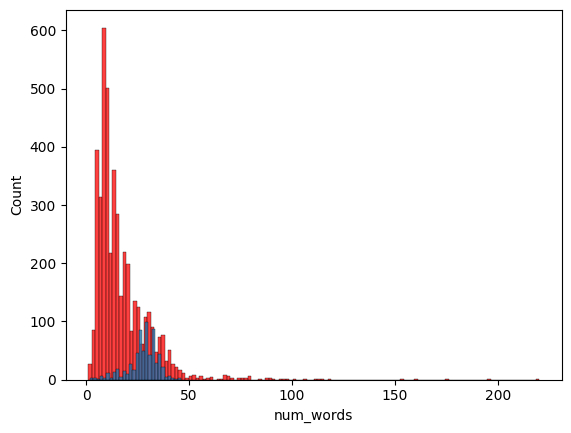

In [24]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'])

we can see ham messages are more towards larger num_words and num_characters. It also has outliers for ham messages.

# **Data preprocessing**

1.   Lower case
2.   Word tokenizing
3.   Remove special characters
4.   Stop word removal and punctuation
5.   Stemming


In [25]:
from nltk.stem.snowball import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
#function to apply all text preprocessing
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  #remove special characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #apply stemming
  text = y[:]
  y.clear()
  for i in text:
    y.append(nltk.PorterStemmer().stem(i))
  return ' '.join(y)

In [27]:
df['transformed_text'] = df['text'].apply(transform_text)

In [28]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5565,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5566,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5567,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5568,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [29]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [30]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [31]:
len(spam_corpus)

9939

In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))

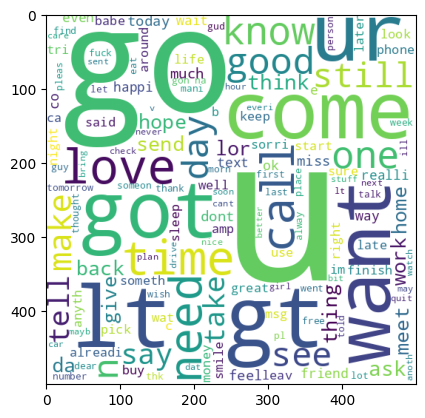

In [34]:
plt.imshow(spam_wc)

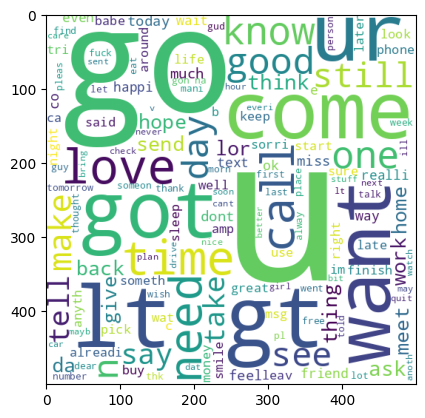

In [35]:
plt.imshow(ham_wc)

In [36]:
#from collections import Counter
#sns.barplot(df['target']==1)

# **Model Building**

We can use 3 types of vectorizers


1.   Bag of words
2.   Tfidf
3.   word2vec



**Using BagOfWords for vectorization**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
#using bagofwords vectorizer
cv = CountVectorizer()

In [38]:
#convert from sparse to dense matrix
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
print(X[0:1, 0:])

[[0 0 0 ... 0 0 0]]


In [40]:
X.shape

(5167, 6708)

In [41]:
y = df['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5565    1
5566    0
5567    0
5568    0
5569    0
Name: target, Length: 5167, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =  BernoulliNB()

**GaussianNB**

In [45]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[777 114]
 [ 18 125]]
0.5230125523012552


**MultinomialNB**

In [46]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[876  15]
 [  8 135]]
0.9


**BernoulliNB**

In [47]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[887   4]
 [ 23 120]]
0.967741935483871


In case of MultinomialNB, the accuracy and precision both are good, but in the confusion matrix, we can see the FP is 15 which is not good. It means 15 messages are classified as Spam but actually they are not. Simillarily, in case of  BernouliNB, we have 4 FP which is better compared to MultinomialNB. 

**Repeat the same using tfidf vectorizer**

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**GaussianNB**

In [51]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[778 113]
 [ 23 120]]
0.5150214592274678


**MultinomialNB**

In [52]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[891   0]
 [ 46  97]]
1.0


**BernoulliNB**

In [53]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[887   4]
 [ 23 120]]
0.967741935483871


**With Tfidf as vectorizer:** In case of MultinomialNB, the accuracy has reduces compared to the one we got with BagOfWords but the precision is improved to 1, and in the confusion matrix, we can see the FP is 0 which is the best case for precision. It means no messages is wrongly classified as Spam. In the case of  BernouliNB, we have seen no improvement compared to the one we got with BagOfWords. Hence MultinomialNB with Tfidf is performing best among all.

**Function to train various models and get the accuracy and precision accordingly**

In [54]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  print("Classification: ",clf)
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy ,precision

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Classification:  SVC(gamma=1.0, kernel='sigmoid')
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9834710743801653
Classification:  KNeighborsClassifier()
For  KN
Accuracy -  0.8926499032882012
Precision -  1.0
Classification:  MultinomialNB()
For  NB
Accuracy -  0.9555125725338491
Precision -  1.0
Classification:  DecisionTreeClassifier(max_depth=5)
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8434782608695652
Classification:  LogisticRegression(penalty='l1', solver='liblinear')
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9611650485436893
Classification:  RandomForestClassifier(n_estimators=50, random_state=2)
For  RF
Accuracy -  0.971953578336557
Precision -  0.9913793103448276
Classification:  AdaBoostClassifier(random_state=2)
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9655172413793104
Classification:  BaggingClassifier(n_estimators=50, random_state=2)
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8796992481203008
Classification: 

In [59]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [60]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.892650,1.000000
2,NB,0.955513,1.000000
5,RF,0.971954,0.991379
0,SVC,0.974855,0.983471
8,ETC,0.972921,0.983193
6,AdaBoost,0.966151,0.965517
4,LR,0.953578,0.961165
10,xgb,0.967118,0.943089
9,GBDT,0.950677,0.925926
7,BgC,0.959381,0.879699


From the table above, we can see that Naive Bayes and Random forest are the better in terms of Precision and accuracy. KN is giving high precision but the accuracy is not good.

1) We can try by scaling the tfidf vectorised matrix and then train it using same set of algorithms.

2) Next we can try by restricting max features in Tfidf and then train it with all the models.
But MNB with normal tfidf is giving best result so we will save it in the form of pickle file.

In [61]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))